# A network-based method to harmonize data classifications
## SCIAN-CIIU-NAICS

In [1]:
## Cargamos paquetes 
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from py2cytoscape import util as cy 
from py2cytoscape import cytoscapejs as cyjs
import requests
import json
from IPython.display import Image
from IPython.display import Markdown as md
import os 

<IPython.core.display.Javascript object>

In [40]:
## Definimos rutas donde se encuentran las correspondencias scian-ciiu
FILE_PATH = os.getcwd()
CWS_PATH = os.path.abspath(os.path.join(*[".."]*3, "empleo"))
CIIU_SCIAN_FILE_PATH = os.path.join(CWS_PATH, "scian-ciiu", "ciiu-4_scian-2018.json")
CIIU_NAICS_FILE_PATH = os.path.join(CWS_PATH, "naics", "output","isic_4_to_naics_2017.json")
OUTPUT_PATH = os.path.abspath(os.path.join("..", "output"))


In [3]:
# Cargamos las correspondencias entre CIIU Rev 4-SCIAN 2018
ciiu_scian = json.load(open(CIIU_SCIAN_FILE_PATH, "r"))
df_ciiu_scian = pd.DataFrame(
    [(f"{int(ciiu):04}", scian) for ciiu, scian_clases in ciiu_scian.items() for scian in scian_clases]
    , columns = ["ciiu", "scian"]
)
df_ciiu_scian

,ciiu,scian
0,0111,111110
1,0111,111121
2,0111,111122
3,0111,111129
4,0111,111131
...,...,...
1580,8430,931610
1581,8421,931710
1582,8422,931810
1583,9900,932110


In [4]:
# Cargamos las correspondencias entre CIIU Rev 4-NAICS 2017
ciiu_naics = json.load(open(CIIU_NAICS_FILE_PATH, "r"))
df_ciiu_naics = pd.DataFrame(
    [(f"{int(ciiu):04}", scian) for ciiu, scian_clases in ciiu_naics.items() for scian in scian_clases]
    , columns = ["ciiu", "naics"]
)
df_ciiu_naics

,ciiu,naics
0,0111,111110
1,0111,111120
2,0111,111130
3,0111,111140
4,0111,111150
...,...,...
1648,9609,812910
1649,9609,812930
1650,9609,812990
1651,9700,814110


In [7]:
## ¿Las actividades CIIU comparten las mismas clases SCIAN-NAICS?

for k,v in ciiu_naics.items():
    if (k in ciiu_scian):
        coincidendia = len(set(ciiu_scian[k]).intersection(v))

        if coincidendia != len(v):
            print(f"CIIU {k} --> Clases - scian {coincidendia} - naics {len(v)}")
            print("scian")
            print(ciiu_scian[k])
            print("naics")
            print(v)

CIIU 1010 --> Clases - scian 4 - naics 6
scian
['311412', '311611', '311612', '311613', '311614']
naics
['311412', '311611', '311612', '311613', '311615', '311710']
CIIU 1030 --> Clases - scian 4 - naics 11
scian
['311214', '311340', '311411', '311421', '311422', '311910', '311930', '311993', '311999']
naics
['311211', '311411', '311421', '311423', '311911', '311919', '311930', '311941', '311942', '311991', '311999']
CIIU 1040 --> Clases - scian 1 - naics 4
scian
['311222', '311710']
naics
['311221', '311224', '311225', '311710']
CIIU 1050 --> Clases - scian 4 - naics 5
scian
['311511', '311512', '311513', '311520']
naics
['311511', '311512', '311513', '311514', '311520']
CIIU 1061 --> Clases - scian 3 - naics 4
scian
['311211', '311212', '311213', '311214', '311230', '311820']
naics
['311211', '311212', '311230', '311824']
CIIU 1062 --> Clases - scian 1 - naics 2
scian
['311221', '311222', '311830']
naics
['311221', '311225']
CIIU 1071 --> Clases - scian 4 - naics 7
scian
['311811', '

In [8]:
# count number of classes each naics2002 and naics2007 maps to

def group_sum(pdframe,x,group,newvar):
    newframe = pdframe.groupby(group)[[x]].sum().reset_index()
    newframe = newframe.rename(columns={x:newvar}) 
    merged = pdframe.merge(newframe,on=group)
    return merged

df_ciiu_scian['ones']=1
df_ciiu_scian = group_sum(df_ciiu_scian,'ones','ciiu','by_ciiu')
df_ciiu_scian = group_sum(df_ciiu_scian,'ones','scian','by_scian')
df_ciiu_scian = df_ciiu_scian[['ciiu','scian','by_ciiu','by_scian']]
df_ciiu_scian

,ciiu,scian,by_ciiu,by_scian
0,0111,111110,18,1
1,0111,111121,18,1
2,0111,111122,18,1
3,0111,111129,18,1
4,0111,111131,18,1
...,...,...,...,...
1580,8430,931610,1,2
1581,8421,931710,1,1
1582,8422,931810,1,1
1583,9900,932110,2,1


In [9]:
df_ciiu_naics['ones']=1
df_ciiu_naics = group_sum(df_ciiu_naics,'ones','ciiu','by_ciiu')
df_ciiu_naics = group_sum(df_ciiu_naics,'ones','naics','by_naics')
df_ciiu_naics = df_ciiu_naics[['ciiu','naics','by_ciiu','by_naics']]
df_ciiu_naics

,ciiu,naics,by_ciiu,by_naics
0,0111,111110,9,1
1,0111,111120,9,1
2,0111,111130,9,1
3,0111,111140,9,1
4,0111,111150,9,1
...,...,...,...,...
1648,9603,812220,2,1
1649,9609,812191,5,1
1650,9609,812199,5,1
1651,9609,812910,5,1


In [ ]:
## Removemos agricultura
#df_ciiu_scian = df_ciiu_scian[df_ciiu_scian["scian"].apply(lambda x : not x.startswith("1"))].reset_index(drop = True)
#df_ciiu_naics = df_ciiu_naics[df_ciiu_naics["naics"].apply(lambda x : not x.startswith("1"))].reset_index(drop = True)

## CIIU-SCIAN

In [10]:
"""
generate graph/network here
"""

# empty graph/network
G_ciiu_scian = nx.Graph()
  

# add edges    
for k in df_ciiu_scian.index:
    i = tuple(df_ciiu_scian.iloc[[k]]["ciiu"].values)[0] 
    j = tuple(df_ciiu_scian.iloc[[k]]["scian"].values)[0] 
    G_ciiu_scian.add_edge(int(i),int(j)) 


In [11]:
def basic_stats(G):
    print("nodes: %d" % G.number_of_nodes())
    print("edges: %d" % G.number_of_edges())

In [12]:
basic_stats(G_ciiu_scian)

nodes: 1500
edges: 1585


In [13]:
#gen sets
set_i = df_ciiu_scian[['ciiu']]
set_i = set_i.drop_duplicates(keep='first')
set_i['set_type']=int(1)
set_j = df_ciiu_scian[['scian']]
set_j = set_j.drop_duplicates(keep='first')
set_j['set_type']=int(2)

set_i.ciiu = set_i.ciiu.astype(int)
set_i

set_j.scian = set_j.scian.astype(int)
set_j
# node attributes
node_type = set_i.set_index("ciiu").set_type.to_dict()
node_type.update(set_j.set_index("scian").set_type.to_dict() )
for k in node_type:
    node_type[k]=int(node_type[k])

# assign attributes to networkx G
nx.set_node_attributes(G_ciiu_scian,node_type,"n_type")


In [14]:
# move network from networkx to cy
G_ciiu_scian.node = G_ciiu_scian.nodes
cytoscape_network = cy.from_networkx(G_ciiu_scian)

In [15]:
# Basic Setup
PORT_NUMBER = 1234
IP = 'localhost'
BASE = 'http://' + IP + ':' + str(PORT_NUMBER) + '/v1/'
HEADERS = {'Content-Type': 'application/json'}
requests.delete(BASE + 'session')

<Response [200]>

In [16]:
res1 = requests.post(BASE + 'networks', data=json.dumps(cytoscape_network), headers=HEADERS)
res1_dict = res1.json()
new_suid = res1_dict['networkSUID']
requests.get(BASE + 'apply/layouts/force-directed/' + str(new_suid))

<Response [200]>

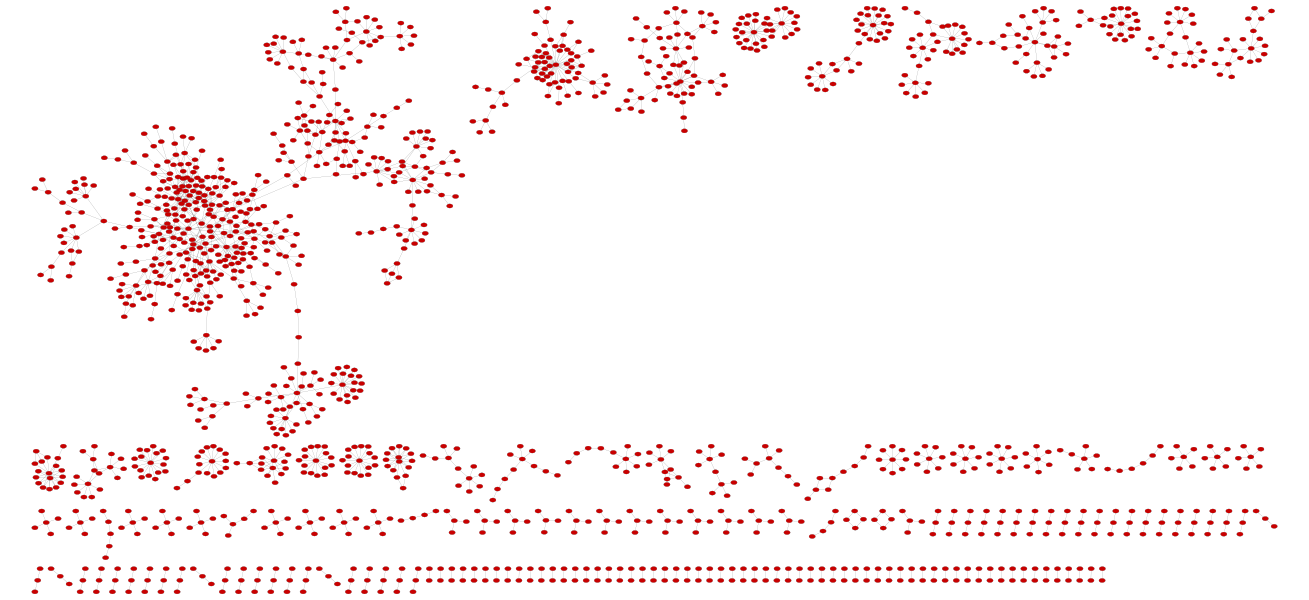

In [17]:
style_name = 'Basic_Style'

my_style = {
  "title" : style_name,
  "mappings" : [{
    "mappingType" : "discrete",
    "mappingColumn" : "n_type",
    "mappingColumnType" : "Double",
    "visualProperty" : "NODE_FILL_COLOR",
       "map" : [ {
      "key" : "1",
      "value" : "#CC0000"
    }, {
      "key" : "2",
      "value" : "#009999"
    }]  
  }], 
   'defaults': [{
       'visualProperty': 'EDGE_TRANSPARENCY', 
       'value': 255
  }, {
    "visualProperty" : "NODE_SIZE",
    'value': 20
  }, {
    "visualProperty" : "EDGE_WIDTH",
    'value': 1
  },{
       'visualProperty': 'NODE_LABEL_FONT_SIZE', 
       'value': 12
   },{
       'visualProperty': 'NODE_LABEL_TRANSPARENCY', 
       'value': 250
   }, {
       'visualProperty': 'NODE_TRANSPARENCY', 
       'value': 250
   }]
}

# Create new Visual Style
res = requests.post(BASE + "styles", data=json.dumps(my_style), headers=HEADERS)
new_style_name = res.json()['title']

# Apply it to current netwrok
requests.get(BASE + 'apply/styles/' + new_style_name + '/' + str(new_suid))

# Display
Image(BASE+'networks/' + str(new_suid) + '/views/first.png')

## CIIU-NAICS

In [18]:
"""
generate graph/network here
"""

# empty graph/network
G_ciiu_naics = nx.Graph()
  

# add edges    
for k in df_ciiu_naics.index:
    i = tuple(df_ciiu_naics.iloc[[k]]["ciiu"].values)[0] 
    j = tuple(df_ciiu_naics.iloc[[k]]["naics"].values)[0] 
    G_ciiu_naics.add_edge(int(i),int(j)) 

basic_stats(G_ciiu_naics)

nodes: 1477
edges: 1652


In [19]:
#gen sets
set_i = df_ciiu_naics[['ciiu']]
set_i = set_i.drop_duplicates(keep='first')
set_i['set_type']=int(1)
set_j = df_ciiu_naics[['naics']]
set_j = set_j.drop_duplicates(keep='first')
set_j['set_type']=int(2)

set_i.ciiu = set_i.ciiu.astype(int)
set_i

set_j.naics = set_j.naics.astype(int)
set_j

# node attributes
node_type = set_i.set_index("ciiu").set_type.to_dict()
node_type.update(set_j.set_index("naics").set_type.to_dict() )
for k in node_type:
    node_type[k]=int(node_type[k])

# assign attributes to networkx G
nx.set_node_attributes(G_ciiu_naics,node_type,"n_type")

In [20]:
# move network from networkx to cy
G_ciiu_naics.node = G_ciiu_naics.nodes
cytoscape_network = cy.from_networkx(G_ciiu_naics)

In [21]:
# Basic Setup
PORT_NUMBER = 1234
IP = 'localhost'
BASE = 'http://' + IP + ':' + str(PORT_NUMBER) + '/v1/'
HEADERS = {'Content-Type': 'application/json'}
requests.delete(BASE + 'session')

<Response [200]>

In [22]:
res1 = requests.post(BASE + 'networks', data=json.dumps(cytoscape_network), headers=HEADERS)
res1_dict = res1.json()
new_suid = res1_dict['networkSUID']
requests.get(BASE + 'apply/layouts/force-directed/' + str(new_suid))

<Response [200]>

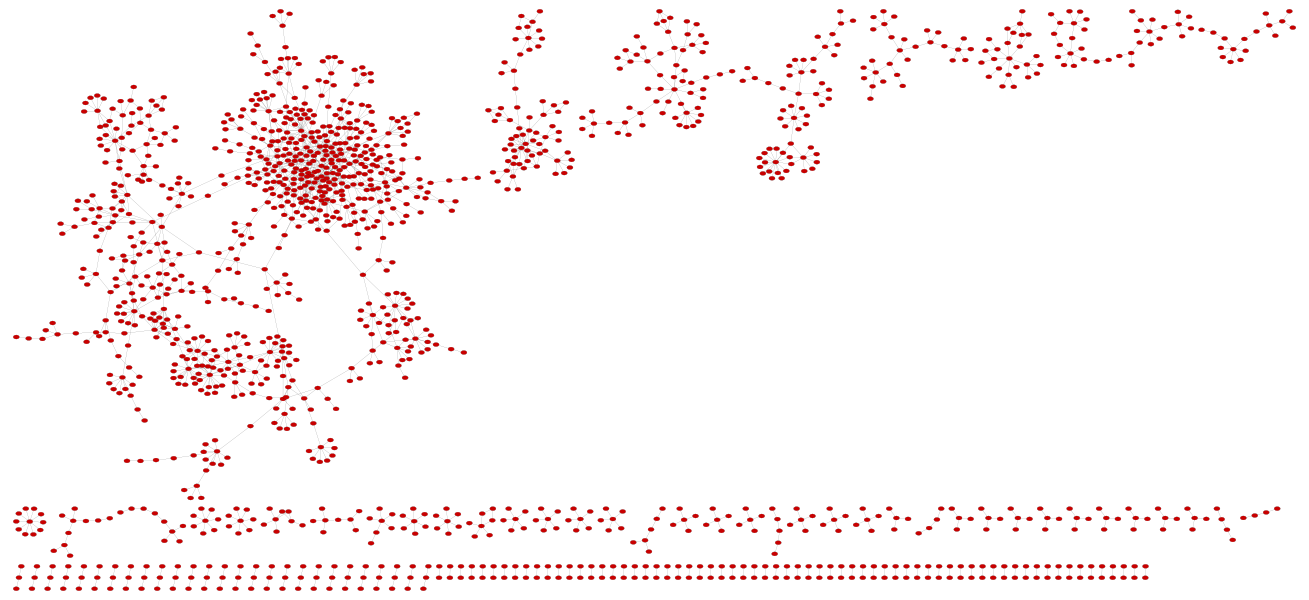

In [23]:
style_name = 'Basic_Style'

my_style = {
  "title" : style_name,
  "mappings" : [{
    "mappingType" : "discrete",
    "mappingColumn" : "n_type",
    "mappingColumnType" : "Double",
    "visualProperty" : "NODE_FILL_COLOR",
       "map" : [ {
      "key" : "1",
      "value" : "#CC0000"
    }, {
      "key" : "2",
      "value" : "#009999"
    }]  
  }], 
   'defaults': [{
       'visualProperty': 'EDGE_TRANSPARENCY', 
       'value': 255
  }, {
    "visualProperty" : "NODE_SIZE",
    'value': 20
  }, {
    "visualProperty" : "EDGE_WIDTH",
    'value': 1
  },{
       'visualProperty': 'NODE_LABEL_FONT_SIZE', 
       'value': 12
   },{
       'visualProperty': 'NODE_LABEL_TRANSPARENCY', 
       'value': 250
   }, {
       'visualProperty': 'NODE_TRANSPARENCY', 
       'value': 250
   }]
}

# Create new Visual Style
res = requests.post(BASE + "styles", data=json.dumps(my_style), headers=HEADERS)
new_style_name = res.json()['title']

# Apply it to current netwrok
requests.get(BASE + 'apply/styles/' + new_style_name + '/' + str(new_suid))

# Display
Image(BASE+'networks/' + str(new_suid) + '/views/first.png')

## 4 Main methodology  

### 4.1 An error-free solution to the many-to-many problem

The principle behind the method is rather simple: we are going to define a new, fictional, target classification, for each of the connected components in the network.

In [24]:
nc = nx.number_connected_components(G_ciiu_scian)
nc


167

In [25]:
nc = nx.number_connected_components(G_ciiu_naics)
nc

138

The new classification will have 151 industry classes. Each of the CIIU and each of the  SCIAN 2018 will converge towards one (and one only) of these 151 new classes.

With CIIU denoted with $i$, SCIAN 2018 with $j$, and the new classification with $k$. The concordance function is in this case
 

\begin{equation}
f^{CC}\left(\mathbf{C}_{ij}\right) = \left[
\begin{array}{c}
T_{ik} \\
T_{jk}
\end{array}
\right]
\end{equation}


That is, in this case, the concordance function (CC for connected components) has two outputs: one transformation matrix for $i$ and one for $j$. In practical terms we need to identify which of the CIIU and SCIAN belong to which component. The following code does that, returning the two transformation matrices $T_{ik}$ and $T_{jk}$

In [26]:
set_i.shape[0]

420

## 6 The complex case in a many-to-many mapping
### 6.1 When the network has a large connected component 

Let's consider a case where the concordance network has one large connected component. It may not be the only component, but let us say that it dominates the network significantly. In this case the method outlined this far is not suited to harmonize the classifications, as we would only have one (or very few) final classification.

We can however apply a modification of this method -- still based on network analysis -- that can provide an elegant solution, even though it is not error free.

The core idea behind the modified method is to identify the clusters (communities, more precisely) in the concordance network, and assign a new "target" classification to each of the clusters.

While a handful of components are small isolates, the majority of the concordance network is made of one large component, which is kept together only by few bridging nodes.

One solution is to use Cytoscape to identify this bridges and disconnect the components by hand. A quicker way to obtain the same result is to run a community discovery algorithm.

In this example I use 'label propagation' algorithm, but several options are possible.

In [27]:
from networkx.algorithms import community

In [28]:
C2 = community.label_propagation_communities(G_ciiu_scian)

In [29]:
list_comp2=sorted(C2, key = len, reverse=True)
nc2 = len(list_comp2)
nc2

356

In [30]:
# final concordance tables generation
C123=pd.DataFrame(columns= ["code","code_3","s"])

i = 0
for c in range(nc2):
    code_3 =c+1 
    for n in list_comp2[c]:
        C123.loc[i] = 0
        C123.loc[i]["code"] = n
        C123.loc[i]["code_3"] = code_3        
        C123.loc[i]["s"] = np.floor(n / (10**(6) ) )  
        i += 1

In [31]:
C123["s"] = 2
C123.loc[C123.code.apply(lambda x: len(str(x))==4 or len(str(x))==3), "s"] = 1
C123

,code,code_3,s
0,4742,1,1
1,466312,1,2
2,466313,1,2
3,466314,1,2
4,466319,1,2
...,...,...,...
1495,931310,354,2
1496,8421,355,1
1497,931710,355,2
1498,931810,356,2


In [32]:
T13=C123.loc[C123["s"]== 1] 
T23=C123.loc[C123["s"]== 2] 

T13.columns=["ciiu","new_code","s"]
T23.columns=["scian","new_code","s"]


In [33]:
T13

,ciiu,new_code,s
0,4742,1,1
5,4759,1,1
6,4761,1,1
11,4773,1,1
14,4789,1,1
...,...,...,...
1490,9499,352,1
1492,9700,353,1
1494,8413,354,1
1496,8421,355,1


In [34]:
T23

,scian,new_code,s
1,466312,1,2
2,466313,1,2
3,466314,1,2
4,466319,1,2
7,465311,1,2
...,...,...,...
1491,813230,352,2
1493,814110,353,2
1495,931310,354,2
1497,931710,355,2


In [35]:
T13.query("new_code==1")["ciiu"].to_list()

[4742, 4759, 4761, 4773, 4789]

In [36]:
T23.query("new_code==1")["scian"].to_list()

[466312,
 466313,
 466314,
 466319,
 465311,
 465312,
 465313,
 466211,
 467114,
 467115,
 465212,
 465913,
 465214,
 466111,
 465216,
 466113,
 466112,
 466114,
 465112,
 468211,
 468212,
 465912,
 464121,
 465914,
 465915,
 465919]

In [37]:
ciiu_scian["4759"]

['465216', '466111', '466112', '466114', '466314']

In [38]:
C123_exporta = C123.copy()
C123_exporta.columns = ["codigo", "codigo_nuevo", "clasificador"]
C123_exporta.loc[C123_exporta.clasificador==1,"clasificador"] = "ciiu"
C123_exporta.loc[C123_exporta.clasificador==2,"clasificador"] = "scian"
C123_exporta

/tmp/ipykernel_13783/1524101089.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ciiu' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  C123_exporta.loc[C123_exporta.clasificador==1,"clasificador"] = "ciiu"


,codigo,codigo_nuevo,clasificador
0,4742,1,ciiu
1,466312,1,scian
2,466313,1,scian
3,466314,1,scian
4,466319,1,scian
...,...,...,...
1495,931310,354,scian
1496,8421,355,ciiu
1497,931710,355,scian
1498,931810,356,scian


In [41]:
C123_exporta.to_csv(os.path.join(OUTPUT_PATH, "recodificacion_ciiu-rev-4_scian_2018.csv") , index = False)

In [42]:
len(C123_exporta.codigo_nuevo.unique())

356

## Visualizamos los cluster

In [43]:
# node attributes
node_type = T13.set_index("ciiu").new_code.to_dict()
node_type.update(T23.set_index("scian").new_code.to_dict() )
for k in node_type:
    node_type[k]=int(node_type[k])

In [44]:
# assign attributes to networkx G
nx.set_node_attributes(G_ciiu_scian,node_type,"n_type")

In [45]:
# move network from networkx to cy

cytoscape_network = cy.from_networkx(G_ciiu_scian)

In [46]:
# Basic Setup
PORT_NUMBER = 1234
IP = 'localhost'
BASE = 'http://' + IP + ':' + str(PORT_NUMBER) + '/v1/'
HEADERS = {'Content-Type': 'application/json'}
requests.delete(BASE + 'session')

<Response [200]>

In [47]:
res1 = requests.post(BASE + 'networks', data=json.dumps(cytoscape_network), headers=HEADERS)
res1_dict = res1.json()
new_suid = res1_dict['networkSUID']
requests.get(BASE + 'apply/layouts/force-directed/' + str(new_suid))

<Response [200]>

In [48]:
import random

number_of_colors = len(C123_exporta.codigo_nuevo.unique())

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

colors_setup = [{"key" : str(i+1), "value" : j} for i,j in enumerate(colors)]


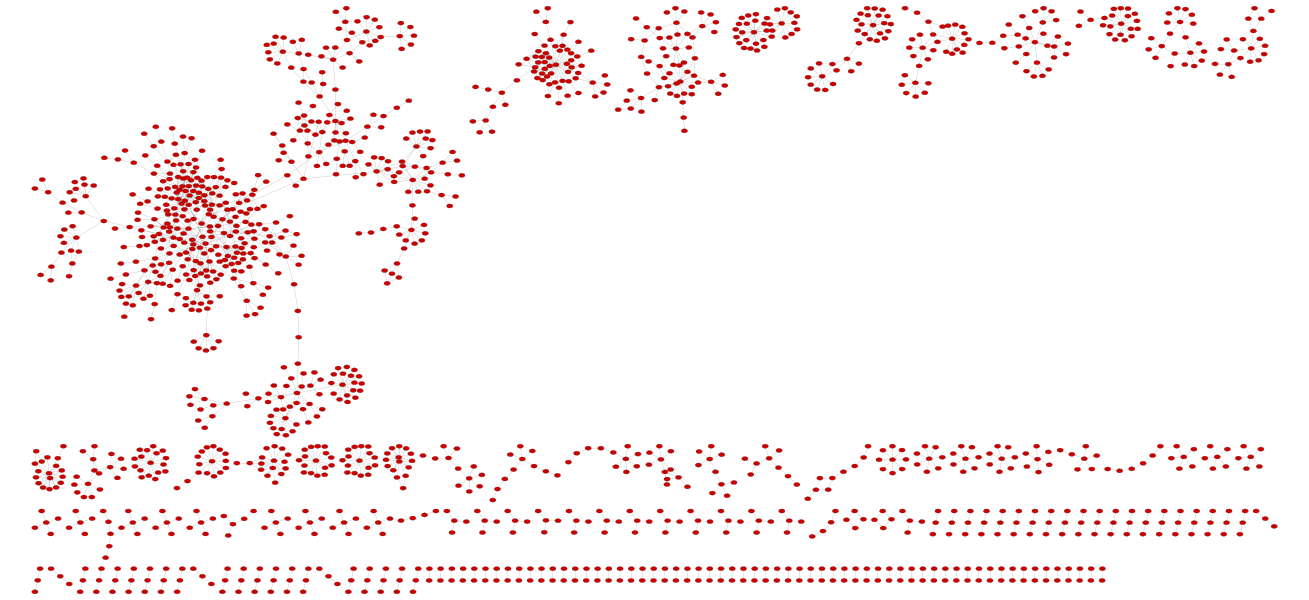

In [49]:
style_name = 'Basic_Style'

my_style = {
  "title" : style_name,
  "mappings" : [{
    "mappingType" : "discrete",
    "mappingColumn" : "n_type",
    "mappingColumnType" : "Double",
    "visualProperty" : "NODE_FILL_COLOR",
      "map" :  colors_setup
  }], 
   'defaults': [{
       'visualProperty': 'EDGE_TRANSPARENCY', 
       'value': 200
  }, {
    "visualProperty" : "NODE_SIZE",
    'value': 40
  },{
       'visualProperty': 'NODE_LABEL_TRANSPARENCY', 
       'value': 200
   }, {
       'visualProperty': 'NODE_TRANSPARENCY', 
       'value': 255
   }]
}


# Create new Visual Style
res = requests.post(BASE + "styles", data=json.dumps(my_style), headers=HEADERS)
new_style_name = res.json()['title']

# Apply it to current netwrok
requests.get(BASE + 'apply/styles/' + new_style_name + '/' + str(new_suid))

# Display
Image(BASE+'networks/' + str(new_suid) + '/views/first.png')